<a href="https://colab.research.google.com/github/AUT-Student/SML-Project/blob/main/SML_Project_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><b>In the name of God</b></center>

<b>Course</b>: Statistical Machine Learning
<br>
<b>Description:</b> Project | Question 1
<br>
<b>Developer</b>: Alireza Mazochi (400131075)

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dataset

In [2]:
!gdown 1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X

Downloading...
From: https://drive.google.com/uc?id=1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X
To: /content/SML_Project_Dataset.zip
100% 436k/436k [00:00<00:00, 115MB/s]


In [3]:
!unzip /content/SML_Project_Dataset.zip

Archive:  /content/SML_Project_Dataset.zip
  inflating: Gold.csv                
  inflating: Kekhak.csv              
  inflating: Khodro.csv              
  inflating: Overall.csv             
  inflating: Shasta.csv              
  inflating: Atlas.csv               
  inflating: Dollar.csv              
  inflating: Foolad.csv              


In [4]:
atlas_dataset = pd.read_csv("/content/Atlas.csv").sort_values("<DTYYYYMMDD>")
foolad_dataset = pd.read_csv("/content/Foolad.csv").sort_values("<DTYYYYMMDD>")
kekhak_dataset = pd.read_csv("/content/Kekhak.csv").sort_values("<DTYYYYMMDD>")
khodro_dataset = pd.read_csv("/content/Khodro.csv").sort_values("<DTYYYYMMDD>")
shasta_dataset = pd.read_csv("/content/Shasta.csv").sort_values("<DTYYYYMMDD>")

In [5]:
datasets = {
    "Atlas": atlas_dataset,
    "Foolad": foolad_dataset,
    "Kekhak": kekhak_dataset,
    "Khodro": khodro_dataset,
    "Shasta": shasta_dataset
}

In [6]:
overall_dataset = pd.read_csv("/content/Overall.csv")

# Overall Index Return

In [7]:
overall_dataset["Return"] = overall_dataset["Close"].diff()/overall_dataset["Close"]

In [8]:
returns = overall_dataset["Return"]

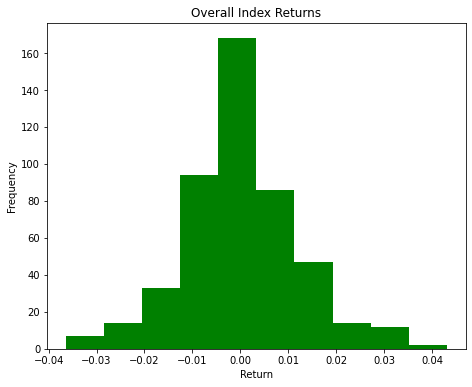

In [9]:
plt.hist(returns, bins=10, color="green")
plt.title("Overall Index Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.gcf().set_size_inches(7.5, 6)
plt.show()

In [10]:
overall_mean = np.mean(returns*100)
overall_var = np.var(returns*100) 

In [11]:
print(f"mean = {round(overall_mean, 4)}, var = {round(overall_var, 3)}")

mean = 0.0265, var = 1.439


# Symetric Hypothesis Test

Refrences:

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

https://mathcracker.com/wilcoxon-signed-ranks

In [ ]:
returns = overall_dataset["Return"][1:]

In [ ]:
np.median(returns)

3.006084588487516e-05

In [ ]:
sign_values = np.sign(np.array(sorted(returns.values, key=lambda x: np.abs(x))))
rank_values = np.array(range(1, len(sign_values)+1))

wp = 0
wm = 0

for rank, sign_sample in zip(rank_values, sign_values):
  if sign_sample == +1:
    wp += rank
  else:
    wm += rank

In [ ]:
T = min(wp, wm)

In [ ]:
n = len(returns)

In [ ]:
z = (T - n*(n+1)/4) / (np.sqrt((n*(n+1)*(2*n+1))/24))

In [ ]:
n

477

In [ ]:
z

-0.26111361907506153

In [ ]:
norm.ppf(1-0.05)

1.6448536269514722

# Stock Return

In [12]:
for name in datasets:
  dataset = datasets[name]
  dataset["Return"] = dataset["<CLOSE>"].diff()/dataset["<CLOSE>"]  
  dataset = dataset[(dataset["<DTYYYYMMDD>"] >= 20210101) & (dataset["<DTYYYYMMDD>"] <= 20221230)]
  datasets[name] = dataset

In [14]:
for name in datasets:
  print(f"{name}")
  dataset = datasets[name]
  returns = dataset["Return"].values*100
  print("Mean: ", np.mean(returns))
  print("Var:", np.var(returns))
  print("========")

Atlas
Mean:  0.07813593101640509
Var: 2.2738622980971646
Foolad
Mean:  -0.2751689313539486
Var: 32.30220376739696
Kekhak
Mean:  -0.388944945447119
Var: 31.527559308976084
Khodro
Mean:  -0.052916287809103256
Var: 7.212302223494045
Shasta
Mean:  -2.9259726605667105
Var: 3006.1962045432756


In [15]:
for name in datasets:
  print(f"{name}")
  dataset = datasets[name]
  returns = dataset["Return"].values*100
  returns = returns[(returns<10) & (returns>-10)]
  print("Mean: ", np.mean(returns))
  print("Var:", np.var(returns))
  print("========")

Atlas
Mean:  0.07813593101640509
Var: 2.2738622980971646
Foolad
Mean:  0.04439484112365826
Var: 4.700321836457606
Kekhak
Mean:  -0.14341543554111755
Var: 3.8652662940705786
Khodro
Mean:  -0.052916287809103256
Var: 7.212302223494045
Shasta
Mean:  -0.018760052779295423
Var: 4.942330727523737


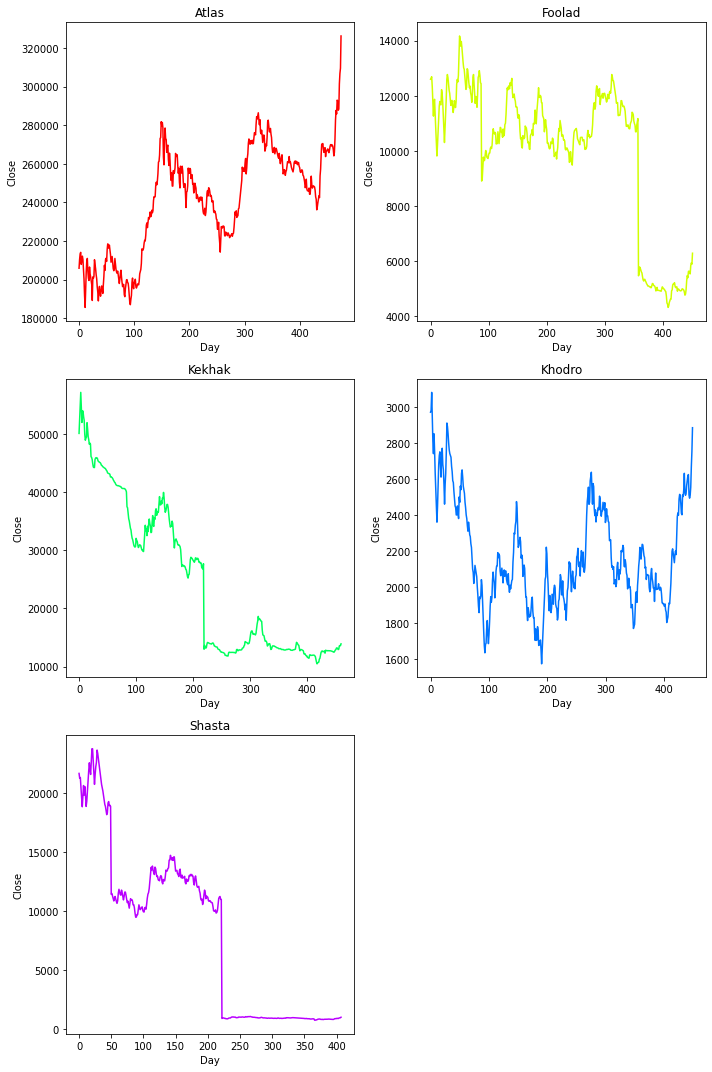

In [16]:
fig, ax = plt.subplots(3,2)
colors = plt.cm.get_cmap("hsv", 6)
for i, name in enumerate(datasets):
  ax[i//2][i%2].plot(datasets[name]["<CLOSE>"].values, c=colors(i))
  ax[i//2][i%2].set_title(name)
  ax[i//2][i%2].set_xlabel("Day")
  ax[i//2][i%2].set_ylabel("Close")

fig.delaxes(ax[2][1])
fig.set_size_inches(10, 15)
fig.tight_layout()
plt.show()

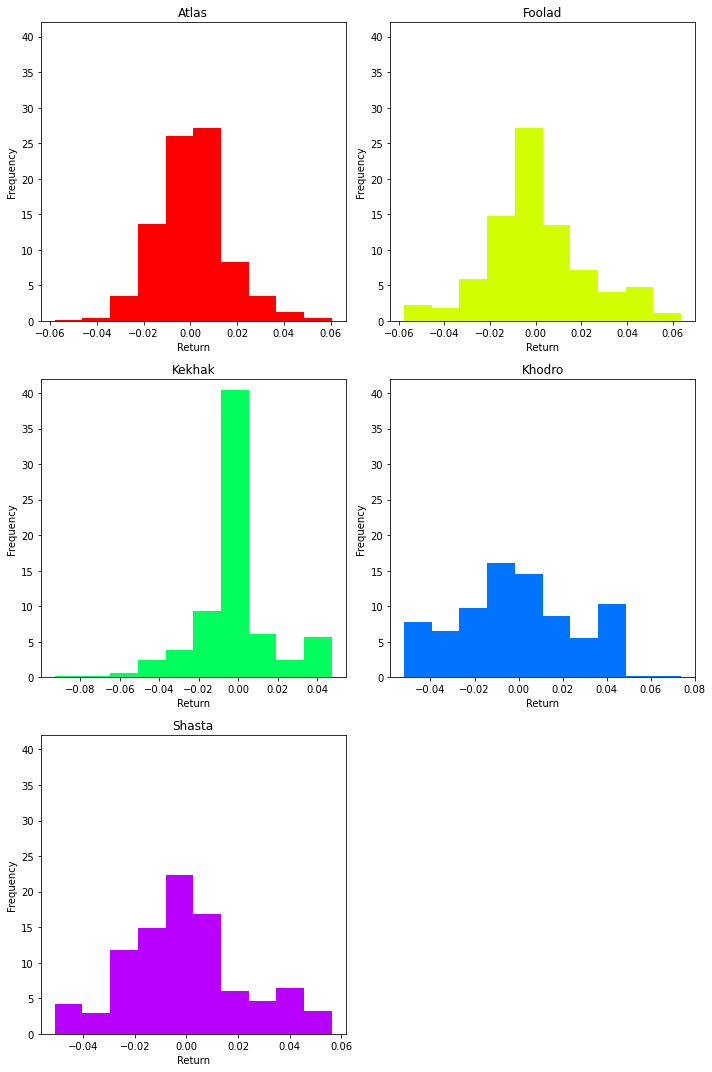

In [24]:
fig, ax = plt.subplots(3,2)
colors = plt.cm.get_cmap("hsv", 6)
for i, name in enumerate(datasets):
  returns = datasets[name]["Return"].values
  returns = returns[(returns<0.10) & (-0.10 < returns)]
  ax[i//2][i%2].hist(returns, density=True, color=colors(i))
  ax[i//2][i%2].set_ylim([0, 42])
  
  ax[i//2][i%2].set_title(name)
  ax[i//2][i%2].set_xlabel("Return")
  ax[i//2][i%2].set_ylabel("Frequency")

fig.delaxes(ax[2][1])
fig.set_size_inches(10, 15)
fig.tight_layout()
plt.show()

# Window Returns

In [18]:
overall_window_dataset = overall_dataset[["Date", "Return"]]

In [19]:
overall_window_dataset["Win10Mean"] = overall_window_dataset["Return"].rolling(10).mean()
overall_window_dataset["Win10Var"] = overall_window_dataset["Return"].rolling(10).var()

overall_window_dataset["Win20Mean"] = overall_window_dataset["Return"].rolling(20).mean()
overall_window_dataset["Win20Var"] = overall_window_dataset["Return"].rolling(20).var()

overall_window_dataset["Win50Mean"] = overall_window_dataset["Return"].rolling(50).mean()
overall_window_dataset["Win50Var"] = overall_window_dataset["Return"].rolling(50).var()

<ipython-input-19-6df9fb5c19f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_window_dataset["Win10Mean"] = overall_window_dataset["Return"].rolling(10).mean()
<ipython-input-19-6df9fb5c19f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_window_dataset["Win10Var"] = overall_window_dataset["Return"].rolling(10).var()
<ipython-input-19-6df9fb5c19f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

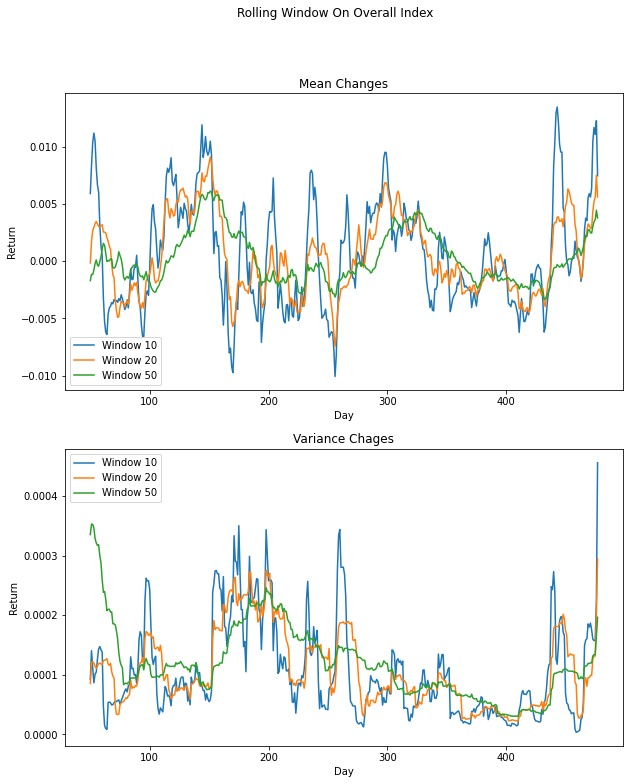

In [20]:
fig, ax = plt.subplots(2)
ax[0].plot(overall_window_dataset[50:]["Win10Mean"], label="Window 10")
ax[0].plot(overall_window_dataset[50:]["Win20Mean"], label="Window 20")
ax[0].plot(overall_window_dataset[50:]["Win50Mean"], label="Window 50")
ax[0].legend()
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Return")
ax[0].set_title("Mean Changes")

ax[1].plot(overall_window_dataset[50:]["Win10Var"], label="Window 10")
ax[1].plot(overall_window_dataset[50:]["Win20Var"], label="Window 20")
ax[1].plot(overall_window_dataset[50:]["Win50Var"], label="Window 50")
ax[1].legend()
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Return")
ax[1].set_title("Variance Chages")

fig.suptitle("Rolling Window On Overall Index")
fig.set_size_inches(10, 12)
plt.show()

<ipython-input-25-8bf20f8f280c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_dataset["Win10Mean"] = window_dataset["Return"].rolling(10).mean()
<ipython-input-25-8bf20f8f280c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  window_dataset["Win10Var"] = window_dataset["Return"].rolling(10).var()
<ipython-input-25-8bf20f8f280c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

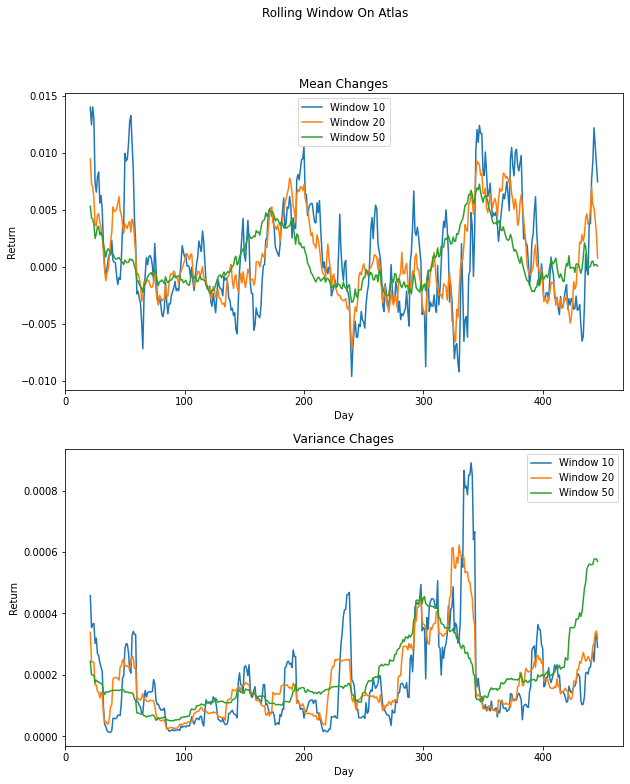

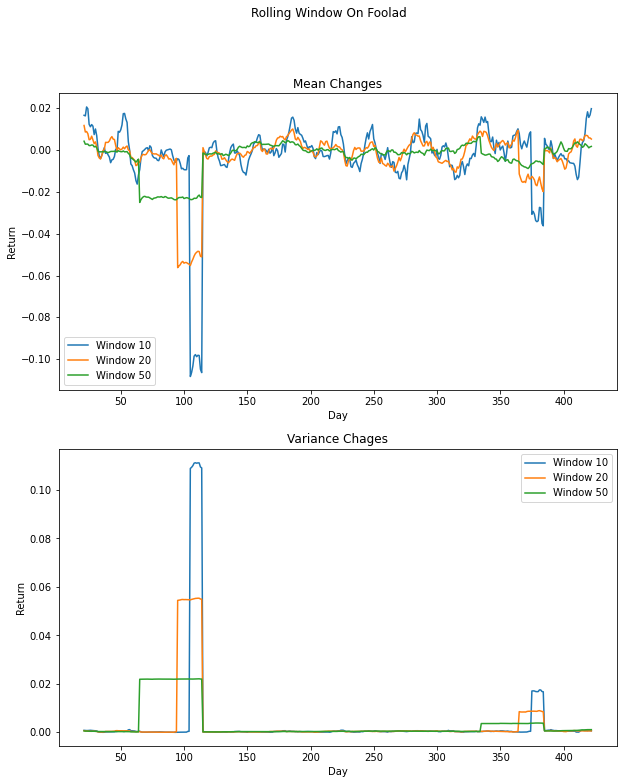

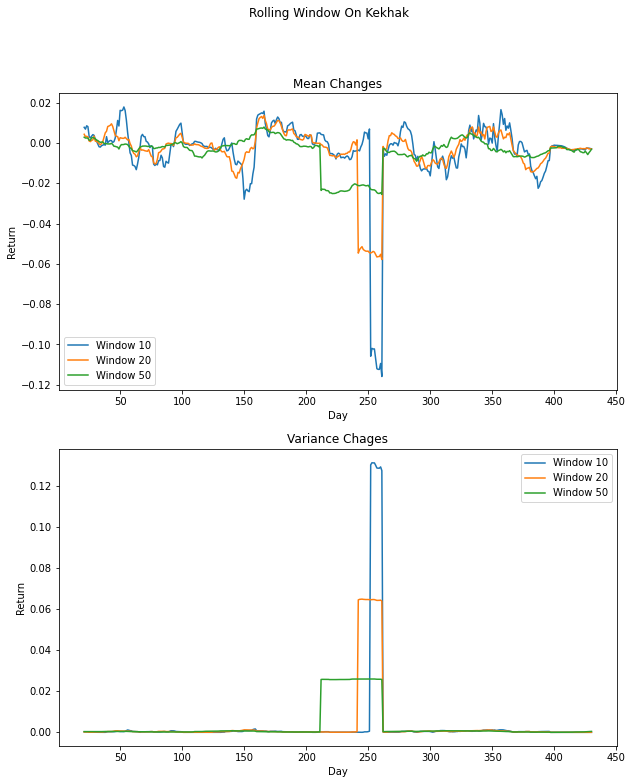

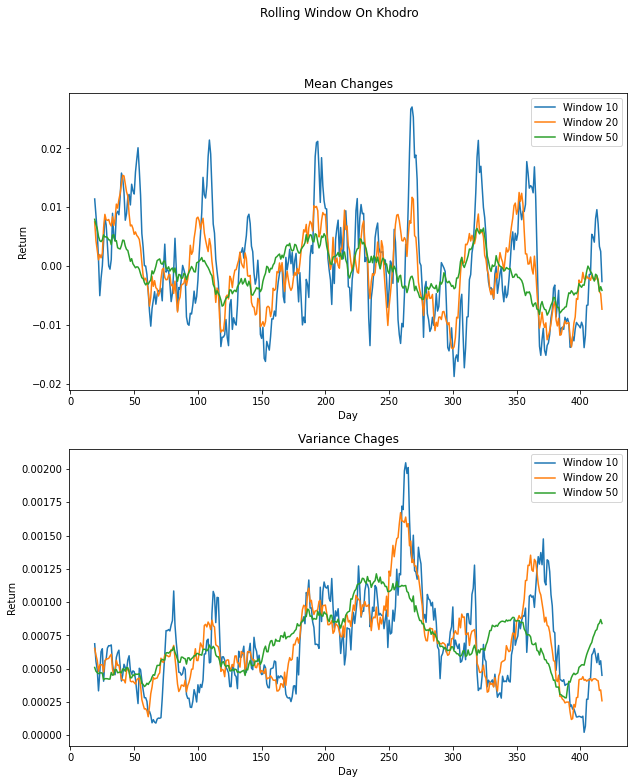

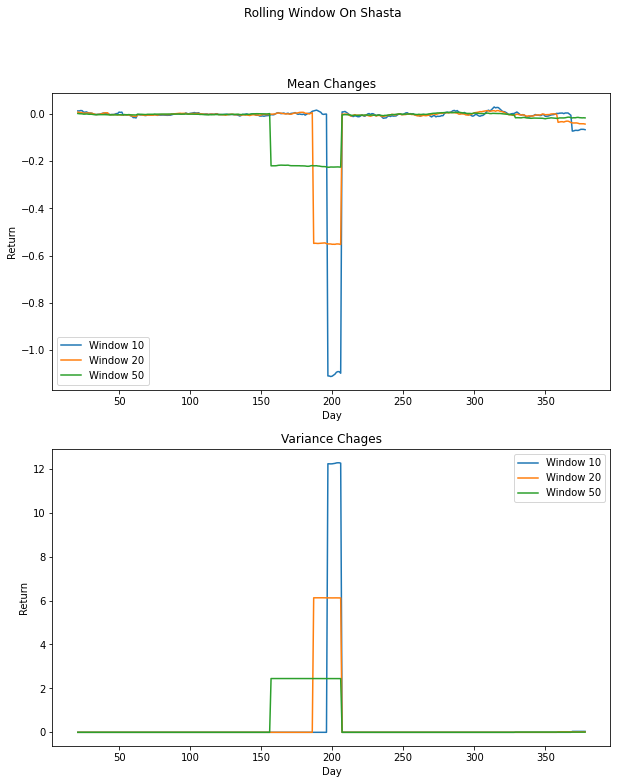

In [25]:
for name in datasets:
  dataset = datasets[name]
  window_dataset = dataset[["<DTYYYYMMDD>", "Return"]]

  window_dataset["Win10Mean"] = window_dataset["Return"].rolling(10).mean()
  window_dataset["Win10Var"] = window_dataset["Return"].rolling(10).var()

  window_dataset["Win20Mean"] = window_dataset["Return"].rolling(20).mean()
  window_dataset["Win20Var"] = window_dataset["Return"].rolling(20).var()

  window_dataset["Win50Mean"] = window_dataset["Return"].rolling(50).mean()
  window_dataset["Win50Var"] = window_dataset["Return"].rolling(50).var()

  fig, ax = plt.subplots(2)
  ax[0].plot(window_dataset[50:]["Win10Mean"], label="Window 10")
  ax[0].plot(window_dataset[50:]["Win20Mean"], label="Window 20")
  ax[0].plot(window_dataset[50:]["Win50Mean"], label="Window 50")
  ax[0].legend()
  ax[0].set_xlabel("Day")
  ax[0].set_ylabel("Return")
  ax[0].set_title("Mean Changes")

  ax[1].plot(window_dataset[50:]["Win10Var"], label="Window 10")
  ax[1].plot(window_dataset[50:]["Win20Var"], label="Window 20")
  ax[1].plot(window_dataset[50:]["Win50Var"], label="Window 50")
  ax[1].legend()
  ax[1].set_xlabel("Day")
  ax[1].set_ylabel("Return")
  ax[1].set_title("Variance Chages")

  fig.suptitle(f"Rolling Window On {name}")
  fig.set_size_inches(10, 12)
  plt.show()

# Finpy TSE

In [ ]:
!pip install finpy_tse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
  Created wheel for unsync: filename=unsync-1.4.0-py3-none-any.whl size=4972 sha256=d14c5c4b1bcb63fb664446820cdba35abdd07585f6639f3bc107250bb1aa84ae
  Stored in directory: /root/.cache/pip/wheels/1d/ba/bb/d6977ef463ab9150e490fe3438c113ac828e1c845a6b09a611
Successfully built unsync


In [ ]:
import pandas as pd
import finpy_tse as fpy

In [ ]:
start_date = '1399-10-12' # 2021-01-01
end_date = '1401-10-10'   # 2022-12-30

In [ ]:
overall_dataset = fpy.Get_CWI_History(
    start_date=start_date,
    end_date=end_date,
    ignore_date=False,
    just_adj_close=False,
    show_weekday=False,
    double_date=True)

overall_dataset.to_csv("D:\\Univercity\\Statistical Machine Learning\\Project\\SML-Project\\Dataset\\Overall.csv")

usd_dataset = fpy.Get_USD_RIAL(
    start_date=start_date,
    end_date=end_date,
    ignore_date=False,
    show_weekday=False,
    double_date=True)

usd_dataset.to_csv("D:\\Univercity\\Statistical Machine Learning\\Project\\SML-Project\\Dataset\\Dollar.csv")

gold_dataset = fpy.Get_Price_History(
    stock='طلا',
    start_date=start_date,
    end_date=end_date,
    ignore_date=False,
    adjust_price=False,
    show_weekday=False,
    double_date=True)

gold_dataset.to_csv("D:\\Univercity\\Statistical Machine Learning\\Project\\SML-Project\\Dataset\\Gold.csv")